# Determining patient fate

In [2]:
import scanpy as sc
import pandas as pd
import cellrank as cr
import ehrapy as ep
import numpy as np

In [3]:
df_annotations = pd.read_csv("public-annotations.csv")

filenames = pd.read_csv("filenames.csv", index_col=None)

df_annotations = df_annotations[df_annotations.filename.isin(list(filenames['filename']))].reset_index(drop=True)
df_annotations['geographic_mean'] = df_annotations['S-Global']

In [4]:
df_annotations['geographic_mean'].replace([0, 1, 2,], "Normal", inplace=True)
df_annotations['geographic_mean'].replace([3, 4, 5], "Mild", inplace=True)
df_annotations['geographic_mean'].replace([6, 7, 8, 9, 10, 11], "Medium", inplace=True)
df_annotations['geographic_mean'].replace([12, 13, 14, 15, 16, 17, 18], "Severe", inplace=True)

In [5]:
adata = sc.read_csv(f"embeddings.csv")
adata.obs['geographic_mean'] = df_annotations['geographic_mean'].values

In [6]:
palette={
        "Normal": "yellowgreen",
        "Mild": "darkorange",
        "Medium": "mediumturquoise",
        "Severe": "red"
    }

/home/zeth/miniconda3/envs/ehrapy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


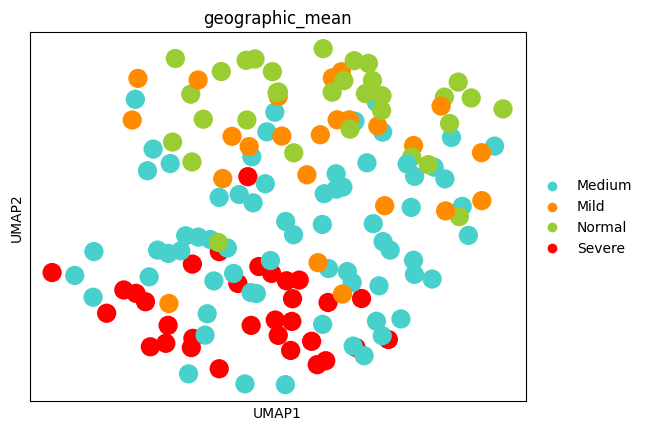

In [7]:
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata, n_components=3)
ep.pl.umap(adata, color=['geographic_mean'], palette=palette)

100%|██████████| 156/156 [00:00<00:00, 633.44cell/s]


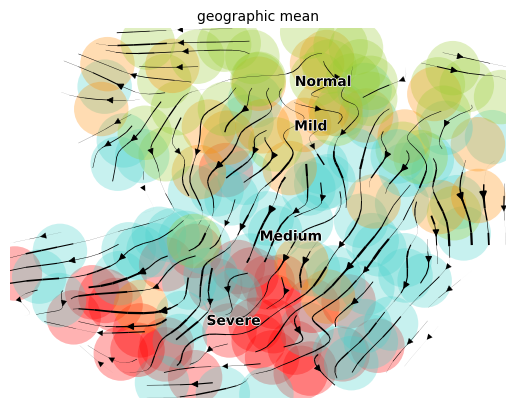

In [8]:
adata.uns["iroot"] = np.flatnonzero(adata.obs['geographic_mean'] == 'Normal')[20]
ep.tl.dpt(adata)
pk = cr.kernels.PseudotimeKernel(adata, time_key="dpt_pseudotime")
pk.compute_transition_matrix(threshold_scheme='soft')
pk.plot_projection(basis="umap", stream=True, color="geographic_mean", density=1, smooth=True)